In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
from sqlalchemy import create_engine

# SQLAlchemy
from sqlalchemy import create_engine, inspect

In [6]:
import numpy as np
import pandas as pd
import datetime as dt

#@event.listens_for(Engine, "connect")
#def set_sqlite_pragma(dbapi_connection, connection_record):
#    cursor = dbapi_connection.cursor()
#    cursor.execute("PRAGMA foreign_keys=ON")
#    cursor.close()

In [7]:
SERVER ='DESKTOP-0ABL0L6'
DATABASE ='DATA_EXTRACT_FROM_CV'
DRIVER = 'ODBC Driver 17 for SQL Server'
#'SQL Server Native Client 11.0'
#USERNAME='SQL Server 15.0.2070.41 - DESKTOP-0ABL0L6\JERRY'
#PASSWORD= '.'
DATABASE_CONNECTION = f'mssql://@{SERVER}/{DATABASE}?driver={DRIVER}'
#DATABASE_CONNECTION = f'mssql://{USERNAME}:{PASSWORD}@{SERVER}/{DATABASE}?driver={DRIVER}'
engine = create_engine(DATABASE_CONNECTION)
CON = engine.connect()
df = pd.read_sql_query('select * from [dbo].[hawaii_measurements]',CON)
df

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0,63
2,USC00519397,2010-01-03,0,74
3,USC00519397,2010-01-04,0,76
4,USC00519397,2010-01-06,,73
...,...,...,...,...
19545,USC00516128,2017-08-19,0.09,71
19546,USC00516128,2017-08-20,,78
19547,USC00516128,2017-08-21,0.56,76
19548,USC00516128,2017-08-22,0.5,76


In [8]:
st = pd.read_sql_query('select * from [dbo].[hawaii_stations]',CON)
st

,station,name,latitude,longitude,elevation
0,USC00519397,"""WAIKIKI 717.2","HI US""",21.2716,"-157.8168,3"
1,USC00513117,"""KANEOHE 838.1","HI US""",21.4234,"-157.8015,14.6"
2,USC00514830,"""KUALOA RANCH HEADQUARTERS 886.9","HI US""",21.5213,"-157.8374,7"
3,USC00517948,"""PEARL CITY","HI US""",21.3934,"-157.9751,11.9"
4,USC00518838,"""UPPER WAHIAWA 874.3","HI US""",21.4992,"-158.0111,306.6"
5,USC00519523,"""WAIMANALO EXPERIMENTAL FARM","HI US""",21.33556,"-157.71139,19.5"
6,USC00519281,"""WAIHEE 837.5","HI US""",21.45167,"-157.84889,32.9"
7,USC00511918,"""HONOLULU OBSERVATORY 702.2","HI US""",21.3152,"-157.9992,0.9"
8,USC00516128,"""MANOA LYON ARBO 785.2","HI US""",21.3331,"-157.8025,152.4"


In [49]:
# reflect an existing database into a new model
# reflect the tables
ms = pd.read_sql_query('select * from [dbo].[hawaii_measurements] hm inner join [dbo].[hawaii_stations] hs on hm.station = hs.station',CON)
ms

,station,date,prcp,tobs,station,name,latitude,longitude,elevation
0,USC00519397,2010-01-01,0.08,65,USC00519397,"""WAIKIKI 717.2","HI US""",21.2716,"-157.8168,3"
1,USC00519397,2010-01-02,0,63,USC00519397,"""WAIKIKI 717.2","HI US""",21.2716,"-157.8168,3"
2,USC00519397,2010-01-03,0,74,USC00519397,"""WAIKIKI 717.2","HI US""",21.2716,"-157.8168,3"
3,USC00519397,2010-01-04,0,76,USC00519397,"""WAIKIKI 717.2","HI US""",21.2716,"-157.8168,3"
4,USC00519397,2010-01-06,,73,USC00519397,"""WAIKIKI 717.2","HI US""",21.2716,"-157.8168,3"
...,...,...,...,...,...,...,...,...,...
19545,USC00516128,2017-08-19,0.09,71,USC00516128,"""MANOA LYON ARBO 785.2","HI US""",21.3331,"-157.8025,152.4"
19546,USC00516128,2017-08-20,,78,USC00516128,"""MANOA LYON ARBO 785.2","HI US""",21.3331,"-157.8025,152.4"
19547,USC00516128,2017-08-21,0.56,76,USC00516128,"""MANOA LYON ARBO 785.2","HI US""",21.3331,"-157.8025,152.4"
19548,USC00516128,2017-08-22,0.5,76,USC00516128,"""MANOA LYON ARBO 785.2","HI US""",21.3331,"-157.8025,152.4"


# Reflect Tables into SQLAlchemy ORM

In [10]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect, func
from sqlalchemy.orm import Session

In [106]:
# Path to sqlite
# Create an engine that can talk to the database
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo= False)

In [56]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [47]:
session = Session(engine)
#for row in session.query()

In [14]:
data = engine.execute("SELECT * FROM measurement LIMIT 15")
#for hawaii in data:
#    print(hawaii.measurement)
print(data)

In [15]:
# We can view all of the classes that automap found
Base = automap_base()
Base.prepare(engine, reflect = True)
Base.classes.keys()

['measurement', 'station']

In [21]:
# Save references to each table
# Mapping classes 
#Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station 
#and Measurement.
measurement = Base.classes.measurement

In [17]:
station = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [30]:
# Measurement File columns are: station, date, prcp, tobs
# stations File columns are: station, name, latitude, longitude, elevation
abc = session.query(measurement).filter(measurement.tobs == '60').all()
#for 

# Exploratory Climate Analysis

In [29]:
#df[df["ms.date"].between('23/08/2017','23/02/2017')]
#engine.execute('select * from measurement where measurement.date between '23/08/2017'and '23/02/2017'')
#kw = pd.read_sql_query('select * from ms where date ms.between between 23/08/2017 and 23/02/2017',CON)
#pd.read_sql_query('select * from [dbo].[hawaii_measurements] hm inner join [dbo].[hawaii_stations] hs on hm.station = hs.station where date between 23/08/2017 and 23/02/2017',CON)

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

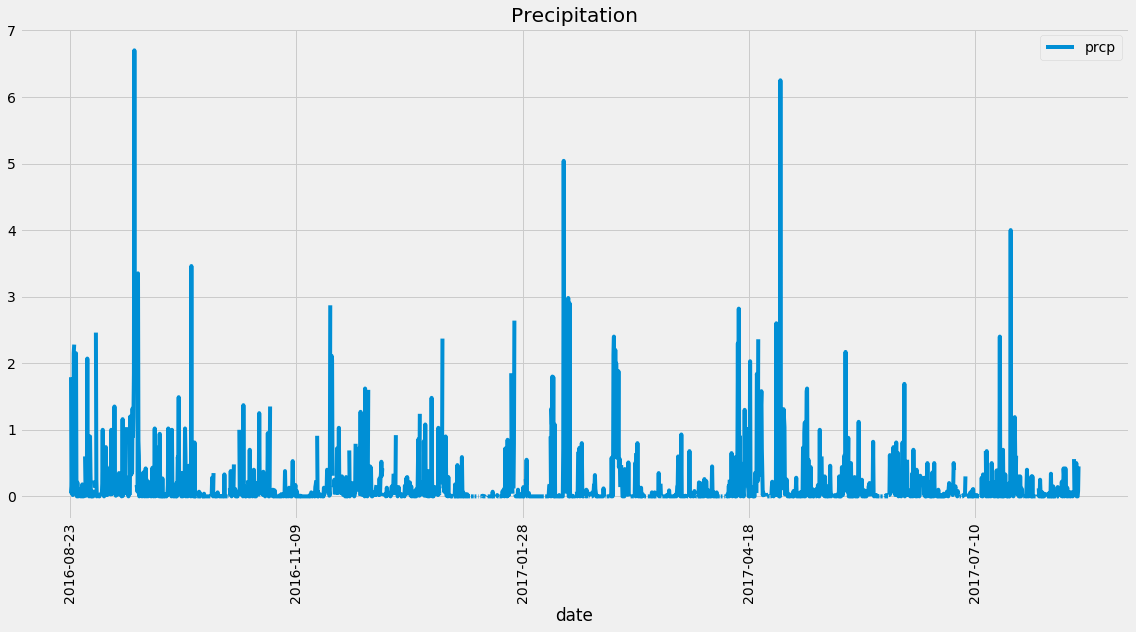

In [28]:
# Design a query to show how many stations are available in this dataset?

# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
latest_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
for index in range(len(latest_date)):
    latest_date_str = latest_date[index]

date_year_ago = dt.date(int(latest_date_str[0:4]),int(latest_date_str[5:7]),int(latest_date_str[8:10]))-dt.timedelta(days=365)
date_year_ago
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(measurement.date, measurement.prcp).\
                filter(measurement.date >=date_year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation,columns=['date', 'prcp'])
precipitation_df['date'].apply(lambda x:dt.datetime.strptime(x, '%Y-%m-%d'))
precipitation_df.set_index('date', inplace=True)

# Sort the dataframe by date
precipitation_df.sort_values('date',inplace=True)
#precipitation_df.dropna(inplace=True)
precipitation_df
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(title="Precipitation", use_index = True, rot=90, figsize=(16,9))
plt.tight_layout()
plt.show()

In [55]:
# What are the most active stations? (i.e. what stations have the most rows)?

# USC00519281 is the most repeated record or has the highest number of rows.
# USC00516128 is the one with highest precipitation values.

# List the stations and the counts in descending order.
#	Records	prcp
#USC00519281	2772	588.64
#USC00519397	2724	131.62
#USC00513117	2709	3.63
#USC00519523	2669	295.68
#USC00516128	2612	1068.09
#USC00514830	2202	234.49
#USC00511918	1979	1.49
#USC00517948	1372	43.44
#USC00518838	511	70.87
#data_merged.count()
#ms.count()
act_st = pd.read_sql_query('select STATION, count(station) AS DS from [dbo].[hawaii_measurements] group by station ORDER BY DS DESC',CON)
act_st

,STATION,DS
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [ ]:
select count(*)

In [64]:
#data_merged["MouseID"].value_counts()
#pd.value_counts(ms['station'])
precipitation_df['prcp'].value_counts()
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
#ms.count()

0.00    874
0.02    113
0.01    100
0.03     77
0.06     58
       ... 
2.11      1
1.24      1
1.88      1
0.86      1
1.80      1
Name: prcp, Length: 160, dtype: int64

In [98]:
# Choose the station with the highest number of temperature observations.
#temperature data is not included in excel documents provided. 

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Mean, median, mode for precipitation values
prec_mean = round(precipitation_df['prcp'].astype('float').mean(), 2)
prec_median = round(precipitation_df['prcp'].astype('float').median(), 2)
prec_mode = round(precipitation_df['prcp'].astype('float').mode(), 2)

#temperature_df = pd.DataFrame(temperature,columns=['date', 'prcp'])
tobs_mean = round(ms['tobs'].astype('float').mean(), 2)
tobs_median = round(ms['tobs'].astype('float').median(), 2)
tobs_mode = round(ms['tobs'].astype('float').mode(), 2)

#temperature_df = pd.DataFrame(temperature,columns=['date', 'prcp'])
tobs_min = round(ms['tobs'].astype('float').min(), 2)
tobs_max = round(ms['tobs'].astype('float').max(), 2)
#tobs_mode = round(ms['tobs'].astype('float').mode(), 2)

#print(f"Temperatures Values Mean {tobs_mean}")
print(f"Temperatures Actual Minimal Value {tobs_min}")
print(f"Temperatures Actual Maximun Value {tobs_max}")

print(f"Temperatures Values Mean {tobs_mean}")
print(f"Temperatures Values Median {tobs_median}")
print(f"Temperatures Values Mode {tobs_mode}")
      
print(f"Precipitation Values Mean {prec_mean}")
print(f"Precipitation Values Median {prec_median}")
print(f"Precipitation Values mode {prec_mode}")
print(f"Precipitation Values covariance {prec_mode.cov}")

Temperatures Actual Minimal Value 53.0
Temperatures Actual Maximun Value 87.0
Temperatures Values Mean 73.1
Temperatures Values Median 73.0
Temperatures Values Mode 0    74.0
dtype: float64
Precipitation Values Mean 0.18
Precipitation Values Median 0.02
Precipitation Values mode 0    0.0
dtype: float64
Precipitation Values covariance <bound method Series.cov of 0    0.0
dtype: float64>


## Bonus Challenge Assignment

In [103]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2010-01-01', '2017-08-23'))

[(53.0, 73.09795396419437, 87.0)]


In [104]:
# for your trip using the previous year's data for those same dates.
print(calc_temps('2012-02-28', '2012-03-05'))


[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Plot the results from your previous query as a bar chart. 

x_axis = measurement.tobs.arange(len(mice_count.index))
x_axis

plt.bar(x_axis, mice_count["MouseID"], color='br',align ="center", width= 0.8)

tick_locations =[value for value in x_axis]
plt.xticks(tick_locations, mice_count.index, rotation= "vertical")

plt.title("Total mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")

plt.show()

# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [105]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
